In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
sns.set_style("darkgrid", {'axes.grid' : True})

### Import Data

In [3]:
df = pd.read_csv('C:/Users/nevin/Downloads/Misc/Projects/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

### Data Exploration

In [4]:
pd.set_option('display.max_colwidth',-1)
# df=df.sample(frac=0.1, replace=False, random_state=1)
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

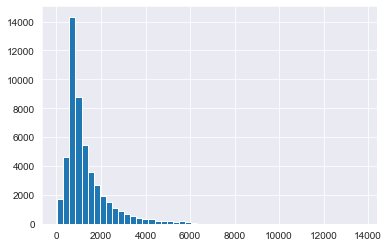

In [5]:
review_len=[len(review) for review in df['review']]
plt.hist(review_len, 50)
plt.show()

### Data Preparation

##### Labelling

In [6]:
Y = [1 if label =='positive' else 0 for label in df['sentiment']]
print(Y[1:5],df['sentiment'][1:5])

[1, 1, 0, 1] 1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object


##### Removing stopwords

In [7]:
from nltk.corpus import stopwords 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [8]:
def filter_stop_words(train_sentences, stop_words):
    for i, sentence in enumerate(train_sentences):
        new_sent = [word for word in sentence.lower().split() if ((word not in stop_words))]
        train_sentences.iloc[i] = ' '.join(new_sent)
    return train_sentences

In [9]:
stopword_filter=True

if stopword_filter:
    stop_words = set(stopwords.words("english"))
    df['review'] = filter_stop_words(df['review'], stop_words)
    
df.head(1)

,review,sentiment
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.<br /><br />the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.<br /><br />it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.<br /><br />i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order get away it, well mannered, middle class inmates turned prison bitches due lack street skills prison experience) watching oz, may become comfortable uncomfortable viewing....thats get touch darker side.",positive


##### Tokenization

In [10]:
vocab_size = 20000 # most common words in the corpus will be kept
tokenizer = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ', oov_token=True)
tokenizer.fit_on_texts(df['review'].values)
X = tokenizer.texts_to_sequences(df['review'].values)

In [11]:
# print(sorted(tokenizer.word_counts, key=tokenizer.word_counts.__getitem__))
# print(tokenizer.document_count)
# print(tokenizer.word_docs)
# len(tokenizer.word_counts)
# print(tokenizer.word_index)

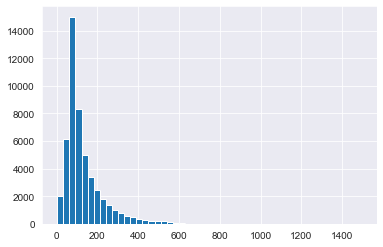

In [12]:
review_len=[len(review) for review in X]
plt.hist(review_len, 50)
plt.show()

##### Padding

In [13]:
X = pad_sequences(X, maxlen=600)
X.shape

(50000, 600)

### Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 13)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(X_train.shape, X_test.shape))

Train dataset shape: (40000, 600), 
Test dataset shape: (10000, 600)


### Modelling 

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [17]:
def create_model(embed_dim = 128, lstm_out = 64, DROPOUT_RATE = 0.2, LEARNING_RATE = 1e-3, batch_size=128):
    model = Sequential()
    model.add(Embedding(vocab_size, embed_dim,input_length = X.shape[1], dropout = DROPOUT_RATE))
    model.add(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2))
    model.add(Dense(1,activation='sigmoid'))
    
    print(model.summary())
    
    loss = 'binary_crossentropy'
    model.compile(loss = loss, optimizer='adam', metrics = ['accuracy'])
    
    return model

In [18]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [19]:
# Instantiate an early stopping callback
# If the validation loss does not decrease on two consecutive tries, stop training
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_LSTM_model.hdf5',save_best_only=True)

callbacks = [early_stopping, model_save]

### Training

In [20]:
%%time
EPOCHS = 6
model = create_model()

# Train and validate model
# To start training, call the model.fit method—the model is "fit" to the training data.
# Note that fit() will return a History object which we can use to plot training vs. validation accuracy and loss.
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=128, validation_data=(X_test, Y_test), verbose=1, callbacks=callbacks)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,609,473
Trainable params: 2,609,473
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 40000 samples, validate on 10000 samples
Epoch 1/6
40000/40000 [==============================] - 316s 8ms/step - loss: 0.4033 - accuracy: 0.8233 - val_loss: 0.2907 - val_accuracy: 0.8824
Epoch 2/6
40000/40000 [==============================] - 366s 9ms/step - loss

### Evaluation of model on test set

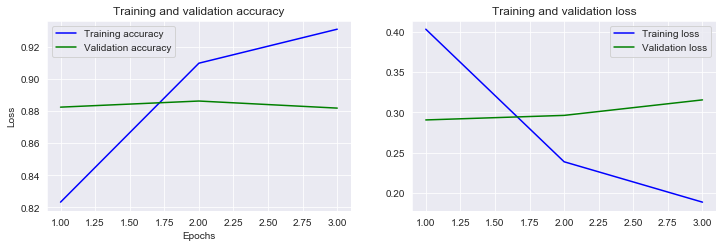

In [21]:
# Let's plot training and validation accuracy as well as loss.
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 3.5))
    
    # Plot accuracy  
    ax1.plot(epochs, accuracy, 'b', label='Training accuracy')
    ax1.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    ax1.set_title('Training and validation accuracy')
    ax1.set(xlabel='Epochs', ylabel='Accuracy')
    ax1.legend()
    
    # Plot loss
    ax2.plot(epochs, loss, 'b', label='Training loss')
    ax2.plot(epochs, val_loss, 'g', label='Validation loss')
    ax2.set_title('Training and validation loss')
    ax1.set(xlabel='Epochs', ylabel='Loss')
    ax2.legend()

plot_history(history)

In [22]:
# Creating an instance of the best model 
best_model=create_model()

# Loads the weights
best_model.load_weights('best_LSTM_model.hdf5')

# Re-evaluate the model
loss,acc = best_model.evaluate(X_test, Y_test, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

# Predicted classes and probabilities
pred=best_model.predict_classes(X_test)
pred_prob=best_model.predict(X_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 128)          2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,609,473
Trainable params: 2,609,473
Non-trainable params: 0
_________________________________________________________________
None
10000/10000 [==============================] - 30s 3ms/step
Restored model, accuracy: 88.24%


### Prediction Examples

#### True Positive

In [23]:
i=6
index,=np.where((X == X_test[i]).all(axis=1))[0]
print(df['review'][index])
print('--')
print('Actual sentiment:', ('positive' if Y[index]==1 else 'negative'))
print('Predicted sentiment:', ('positive' if pred[i][0]==1 else 'negative'), 
      'with probability', (pred_prob[i][0] if pred[i][0]==1 else (1-pred_prob[i][0])))

no. i'm kidding one. guest reviewer entertainment weekly gave movie positive marks. blame him? charming, upbeat, rather funny disney movie. love kittens? music ev'rybody wants cat jamming. makes want snap fingers something. years later cats dance came seen movie musically fun. aristocats lacks animation story, makes charm. plus, everything moves relaxed pace, even villain scary. perfect younger set sappy adults can't like it. snoop here, i'm sure would say thing. yeah. dig crazy cats, man.
--
Actual sentiment: positive
Predicted sentiment: positive with probability 0.90841377


#### True Negative

In [24]:
i=1
index,=np.where((X == X_test[i]).all(axis=1))[0]
print(df['review'][index])
print('--')
print('Actual sentiment:', ('positive' if Y[index]==1 else 'negative'))
print('Predicted sentiment:', ('positive' if pred[i][0]==1 else 'negative'), 
      'with probability', (pred_prob[i][0] if pred[i][0]==1 else (1-pred_prob[i][0])))

summary provided cable tv guide made sound lot interesting actually is. "slaughterhouse rock" far worst horror film ever seen, title previously held "urban legends: final cut". opening scene could tell going really bad, bored care less. film contains laughable acting, especially guy who's tormented dreams, incredible credible plot twists, crappiest music i've heard, i'm living period likes britney spears nsync dominate air waves. biggest problem "slaughterhouse rock" funny. one would film dull boring scary would try spice things bit funny one-liners there, no. tormented guy's self-centered friend trying funny, came across annoying instead. (spoiler) please, tell me, crazy world insane self-loathing enough visit creepy jail middle night? one! going make horror movie, least make believable. one anything but.
--
Actual sentiment: negative
Predicted sentiment: negative with probability 0.9583094120025635


#### False Positive

In [25]:
i=np.argmax(np.reshape(pred,(10000,))-Y_test)
index,=np.where((X == X_test[i]).all(axis=1))[0]
print(df['review'][index])
print('--')
print('Actual sentiment:', ('positive' if Y[index]==1 else 'negative'))
print('Predicted sentiment:', ('positive' if pred[i][0]==1 else 'negative'), 
      'with probability', (pred_prob[i][0] if pred[i][0]==1 else (1-pred_prob[i][0])))

loved apprentice first two seasons.<br /><br />but season 5? (or 6?) things getting plain tiring.<br /><br />i used like show, become donald trumps ego fest. granted company working for, come on! things says "you're fired" insulting.<br /><br />after watching show, would want work him. arrogant, pompous such. show unrealistic way handles things makes squirm. good entertainment? yes, tiring back stabbing gets tiring.. team work, personal, business. watch back jack.
--
Actual sentiment: negative
Predicted sentiment: positive with probability 0.8391373


#### False Negative

In [26]:
i=np.argmin(np.reshape(pred,(10000,))-Y_test)
index,=np.where((X == X_test[i]).all(axis=1))[0]
print(df['review'][index])
print('--')
print('Actual sentiment:', ('positive' if Y[index]==1 else 'negative'))
print('Predicted sentiment:', ('positive' if pred[i][0]==1 else 'negative'), 
      'with probability', (pred_prob[i][0] if pred[i][0]==1 else (1-pred_prob[i][0])))

movie working toward two goals: make political point tell scary adventure story. often difficult make political point still tell good story (consider highly political rarely-entertaining final season ellen). beyond rangoon finds good balance politics storytelling.<br /><br />i already knew aung san suu kyi 1991 nobel peace prize, knew something oppressive political situation burma, political message movie mostly dramatization already knew. thought movie good job telling aung san suu kyi mostly-faceless dictators years tried silence her. device presenting unfamiliar setting eyes character viewers identify fairly common, quite well done movie.<br /><br />of course, real measure movie entertainment value. arquette excellent young woman whose sister took distant, unfamiliar place shake depression violent deaths husband son. convincingly detached depressed. grieving condition gives clear reason distracted wanderings thick dangerous situation understand, something she'd otherwise much intell